In [8]:
import os
import sys
import pandas as pd
import numpy as np
import pickle
sys.path.append('plotting_utils')
sys.path.append('simulation')
from plotting_utils.plotting import *
from simulation.run_multiple_sim import SimArgs

In [9]:
# Collection data from pkl file
file_dir = "new_data"
fname = "timing_expt.pkl"
file_path = os.path.join(file_dir, fname)

with open(file_path,'rb') as fp:
    results = pickle.load(fp)

In [10]:
data = {
    'num_apps': [],
    'num_gpus': [],
    'seed': [],
    'time': [],
}


for k,v in results.items():
    data['num_apps'].append(k.num_apps)
    data['num_gpus'].append(k.num_gpus)
    data['seed'].append(k.seed)
    # convert total_time to minutes
    data['time'].append(v.get('total_time')/60.0)
df = pd.DataFrame(data)

In [11]:
# formatting data so its accepted by plot_utils
timing_info = {
    "gpus": None,
    "512": {
        "values": [],
        "stds": [],
    },
    "1024": {
        "values": [],
        "stds": [],        
    }
}

# get gpus used
gpus = df['num_gpus'].unique().tolist()
gpus.sort()
timing_info['gpus'] = gpus


for num_apps in [512,1024]:
    for num_gpus in gpus:
        cond = (df['num_apps'] == num_apps) & (df['num_gpus'] == num_gpus)
        filtered_df = df[cond]
        times = filtered_df['time']
        timing_info[str(num_apps)]["values"].append(times.mean())
        timing_info[str(num_apps)]["stds"].append(times.std())

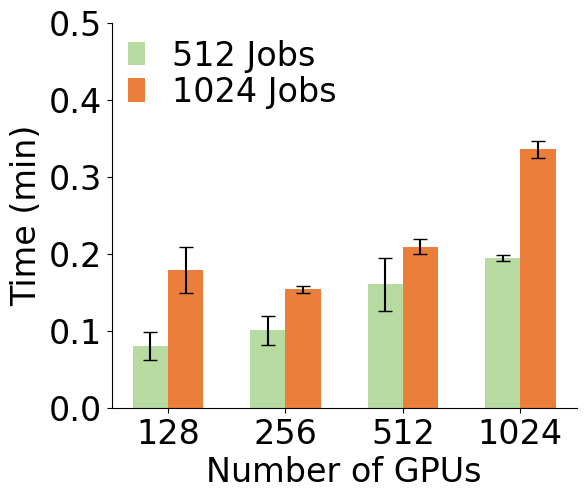

In [12]:
ax = plot_fig9a(timing_info)
ax.set_ylim([0,0.5])
ax.figure